In [1]:
!pip install matplotlib numpy pandas seaborn scikit-learn ipython
!pip install kneed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.2 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

In [3]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [4]:
pd.set_option('display.max_columns', None)
df.head(10)

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,area_,ocupacion_,tip_ss_,cod_ase_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,fecha_contagio,inicio_sintomas,pac_hos_,fec_hos_,condicion_final,fecha_defuncion,fecha_nacimiento,certif_defuncion,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,1,2411,Contributivo,EPS037,2,2,2,2,1,2,2,2,17/01/2020,10/01/2020,2,NaN,1,NaN,12/11/1994,NaN,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,1,9997,Contributivo,EPS003,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,2,NaN,1,NaN,9/02/1995,NaN,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,1,9999,Contributivo,EPS013,2,2,2,2,2,2,2,2,12/01/2020,8/01/2020,2,NaN,1,NaN,19/09/1961,NaN,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,1,4121,Contributivo,EPS013,2,2,2,2,2,2,2,2,10/01/2020,6/01/2020,2,NaN,1,NaN,6/10/1990,NaN,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,1,9210,Especial,37086,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,1,10/01/2020,1,NaN,12/02/1963,NaN,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
5,6,25/01/2020,1,2020,45,1,F,170,68,276,1,5121,Contributivo,EPS016,2,2,2,2,2,2,2,2,16/01/2020,8/01/2020,2,NaN,1,NaN,6/04/1974,NaN,2,1,1,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.073368,-73.088821
6,7,16/01/2020,1,2020,46,1,F,170,68,276,1,7732,Subsidiado,68000,2,2,2,2,2,2,2,2,13/01/2020,11/01/2020,1,13/01/2020,1,NaN,29/09/1973,NaN,2,1,1,2,1,1,1,1,2,1,2,2,2,2,2,2,2,2,2. Hospitalizacion piso,7.080947,-73.089188
7,8,9/01/2020,1,2020,27,1,F,170,68,276,1,2221,Contributivo,EPS005,2,2,2,2,2,2,2,1,9/01/2020,7/01/2020,2,NaN,1,NaN,10/08/1992,NaN,1,1,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.084087,-73.085953
8,9,15/01/2020,1,2020,8,2,F,170,68,276,1,9999,Subsidiado,68000,2,2,2,2,2,2,2,2,12/01/2020,11/01/2020,1,12/01/2020,1,NaN,17/04/2019,NaN,2,1,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2. Hospitalizacion piso,7.083333,-73.102295
9,10,7/01/2020,1,2020,2,1,M,170,68,276,1,9997,Contributivo,EPS013,2,2,2,2,2,2,2,2,7/01/2020,7/01/2020,2,NaN,1,NaN,7/06/2017,NaN,2,1,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067431,-73.097923


In [5]:
df.isna().sum()

ID                      0
fec_not                 0
semana                  0
año                     0
edad_                   0
uni_med_                0
sexo_                   0
cod_pais_o              0
cod_dpto_o              0
cod_mun_o               0
area_                   0
ocupacion_              0
tip_ss_                 0
cod_ase_                9
gp_discapa              0
gp_desplaz              0
gp_migrant              0
gp_carcela              0
gp_gestan               0
gp_calle                0
gp_psiquia              0
gp_vic_vio              0
fecha_contagio          2
inicio_sintomas         2
pac_hos_                0
fec_hos_             1014
condicion_final         0
fecha_defuncion      1262
fecha_nacimiento        0
certif_defuncion     1262
familiar_sintomas       0
fiebre                  0
cefalea                 0
dolor_retroocular       0
mialgias                0
artralgia               0
erupcion                0
dolor_abdomen           0
vomito      

In [6]:
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,area_,ocupacion_,tip_ss_,cod_ase_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,fecha_contagio,inicio_sintomas,pac_hos_,fec_hos_,condicion_final,fecha_defuncion,fecha_nacimiento,certif_defuncion,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,1,2411,Contributivo,EPS037,2,2,2,2,1,2,2,2,17/01/2020,10/01/2020,2,NaN,1,NaN,12/11/1994,NaN,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,1,9997,Contributivo,EPS003,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,2,NaN,1,NaN,9/02/1995,NaN,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,1,9999,Contributivo,EPS013,2,2,2,2,2,2,2,2,12/01/2020,8/01/2020,2,NaN,1,NaN,19/09/1961,NaN,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,1,4121,Contributivo,EPS013,2,2,2,2,2,2,2,2,10/01/2020,6/01/2020,2,NaN,1,NaN,6/10/1990,NaN,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,1,9210,Especial,37086,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,1,10/01/2020,1,NaN,12/02/1963,NaN,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,1,9996,Contributivo,EPS013,2,2,2,2,2,2,2,2,6/03/2020,3/03/2020,2,NaN,1,NaN,3/03/1984,NaN,2,1,1,1,1,1,2,2,1,2,2,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,1,2145,Contributivo,EPS017,2,2,2,2,2,2,2,2,13/03/2020,6/03/2020,1,13/03/2020,1,NaN,3/07/1977,NaN,2,1,1,2,1,1,2,2,2,2,2,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,1,9998,Contributivo,EPS013,2,2,2,2,2,2,2,2,8/03/2020,4/03/2020,2,NaN,1,NaN,3/08/2017,NaN,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,1,9997,Contributivo,EPS016,2,2,2,2,2,2,2,2,11/03/2020,5/03/2020,2,NaN,1,NaN,16/02/2008,NaN,2,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [7]:
df = df.drop('fecha_defuncion', axis = 1)
df = df.drop('certif_defuncion', axis = 1)
df = df.drop('fec_hos_', axis = 1)
df = df.drop('fec_not', axis = 1)
df = df.drop('año', axis = 1)
df = df.drop('semana', axis = 1)
df = df.drop('cod_pais_o', axis = 1)
df = df.drop('cod_dpto_o', axis = 1)
df = df.drop('cod_mun_o', axis = 1)
df = df.drop('ocupacion_', axis = 1)
df = df.drop('tip_ss_', axis = 1)
df = df.drop('cod_ase_', axis = 1)
df = df.drop('fecha_contagio', axis = 1)
df = df.drop('inicio_sintomas', axis = 1)
df = df.drop('fecha_nacimiento', axis = 1)
df = df.drop('conducta', axis = 1)
df = df.drop('condicion_final', axis = 1)

df

,ID,edad_,uni_med_,sexo_,area_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,pac_hos_,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,latitud,longitud
0,1,25,1,F,1,2,2,2,2,1,2,2,2,2,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,7.076011,-73.102501
1,2,24,1,M,1,2,2,2,2,2,2,2,2,2,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,7.079495,-73.105400
2,3,58,1,M,1,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,7.090290,-73.091003
3,4,29,1,F,1,2,2,2,2,2,2,2,2,2,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,7.067435,-73.090958
4,5,56,1,F,1,2,2,2,2,2,2,2,2,1,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,36,1,F,1,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,2,2,1,2,2,2,2,1,2,2,2,2,7.072610,-73.099487
1258,1259,42,1,M,1,2,2,2,2,2,2,2,2,1,2,1,1,2,1,1,2,2,2,2,2,2,2,2,2,1,2,1,7.065252,-73.103607
1259,1260,2,1,M,1,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,7.091391,-73.103264
1260,1261,12,1,F,1,2,2,2,2,2,2,2,2,2,2,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,7.061083,-73.097000


In [8]:
df.dtypes

ID                     int64
edad_                  int64
uni_med_               int64
sexo_                 object
area_                  int64
gp_discapa             int64
gp_desplaz             int64
gp_migrant             int64
gp_carcela             int64
gp_gestan              int64
gp_calle               int64
gp_psiquia             int64
gp_vic_vio             int64
pac_hos_               int64
familiar_sintomas      int64
fiebre                 int64
cefalea                int64
dolor_retroocular      int64
mialgias               int64
artralgia              int64
erupcion               int64
dolor_abdomen          int64
vomito                 int64
diarrea                int64
somnolencia            int64
hipotension            int64
hepatomegalia          int64
hemorragia_mucosa      int64
hipotermia             int64
caida_plaquetas        int64
acum_liquido           int64
aum_hematocrito        int64
latitud              float64
longitud             float64
dtype: object

In [9]:
df["sexo_2"] = 0
df.sexo_2.loc[df.sexo_=="F"] = 0
df.sexo_2.loc[df.sexo_=="M"] = 1
df

<ipython-input-9-5ec10d5024b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sexo_2.loc[df.sexo_=="F"] = 0
<ipython-input-9-5ec10d5024b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sexo_2.loc[df.sexo_=="M"] = 1


,ID,edad_,uni_med_,sexo_,area_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,pac_hos_,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,latitud,longitud,sexo_2
0,1,25,1,F,1,2,2,2,2,1,2,2,2,2,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,7.076011,-73.102501,0
1,2,24,1,M,1,2,2,2,2,2,2,2,2,2,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,7.079495,-73.105400,1
2,3,58,1,M,1,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,7.090290,-73.091003,1
3,4,29,1,F,1,2,2,2,2,2,2,2,2,2,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,7.067435,-73.090958,0
4,5,56,1,F,1,2,2,2,2,2,2,2,2,1,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,7.066905,-73.104980,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,36,1,F,1,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,2,2,1,2,2,2,2,1,2,2,2,2,7.072610,-73.099487,0
1258,1259,42,1,M,1,2,2,2,2,2,2,2,2,1,2,1,1,2,1,1,2,2,2,2,2,2,2,2,2,1,2,1,7.065252,-73.103607,1
1259,1260,2,1,M,1,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,7.091391,-73.103264,1
1260,1261,12,1,F,1,2,2,2,2,2,2,2,2,2,2,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,7.061083,-73.097000,0


In [10]:
columnas_a_actualizar = df.iloc[:,[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]]
for columna in columnas_a_actualizar:
    df[columna] = df[columna].replace({2: 0})

In [11]:
df

,ID,edad_,uni_med_,sexo_,area_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,pac_hos_,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,latitud,longitud,sexo_2
0,1,25,1,F,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,7.076011,-73.102501,0
1,2,24,1,M,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,7.079495,-73.105400,1
2,3,58,1,M,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,7.090290,-73.091003,1
3,4,29,1,F,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,7.067435,-73.090958,0
4,5,56,1,F,1,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,7.066905,-73.104980,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,36,1,F,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,7.072610,-73.099487,0
1258,1259,42,1,M,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,7.065252,-73.103607,1
1259,1260,2,1,M,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,7.091391,-73.103264,1
1260,1261,12,1,F,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,7.061083,-73.097000,0


In [12]:
df = df.drop('sexo_', axis = 1)

In [13]:
array = df.to_numpy()

In [14]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(array)
scaled_df[:5]

array([[-1.73067889, -0.26531106, -0.19149921, -0.12743403, -0.08475117,
        -0.07987231, -0.13008396, -0.03984095,  7.18215381, -0.02816064,
        -0.07987231, -0.09377081, -0.49454619, -0.36309581,  0.03984095,
        -2.47587227,  1.05206689,  0.42620176,  0.60114956,  0.87043677,
        -0.42879472, -0.41707732, -0.34753637, -0.11685298, -0.09797959,
        -0.06306921, -0.15336189, -0.04881438, -0.32415862, -0.09797959,
        -0.17135864, -0.15098307, -0.9022805 , -1.04208945],
       [-1.72793396, -0.31429754, -0.19149921, -0.12743403, -0.08475117,
        -0.07987231, -0.13008396, -0.03984095, -0.139234  , -0.02816064,
        -0.07987231, -0.09377081, -0.49454619, -0.36309581,  0.03984095,
         0.40389806, -0.95050991,  0.42620176, -1.66347954, -1.14884853,
        -0.42879472, -0.41707732, -0.34753637, -0.11685298, -0.09797959,
        -0.06306921, -0.15336189, -0.04881438, -0.32415862, -0.09797959,
        -0.17135864,  0.17099084, -1.26525261,  0.95961052],
  

In [15]:
kmeans_kwargs = {
  "init": "random",
  "n_init": 10,
  "max_iter": 300,
  "random_state": 42,
}

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_df)
  sse.append(kmeans.inertia_)

sse

[42907.99999999997,
 39946.646706925065,
 38385.22422404762,
 37245.39660011517,
 36056.7406668646,
 34632.333628114946,
 33452.00406013281,
 32534.753606345344,
 30922.573578203257,
 29923.700718628243]

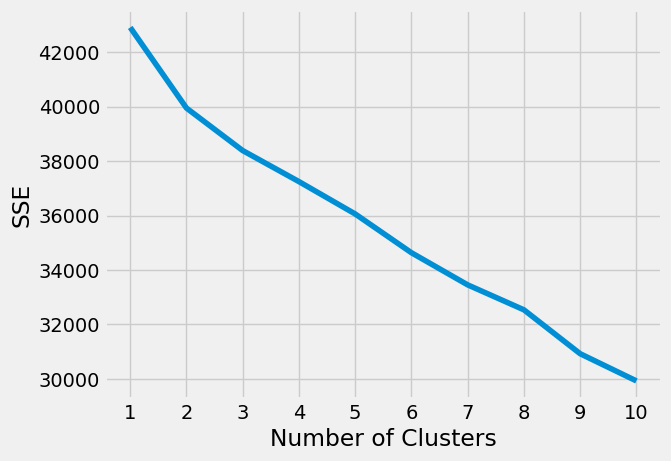

In [16]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [17]:
kl = KneeLocator(
  range(1, 11), sse, curve="convex", direction="decreasing"
)
kl.elbow

In [18]:
silhouette_coefficients = []

for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_df)
  score = silhouette_score(scaled_df, kmeans.labels_)
  silhouette_coefficients.append(score)

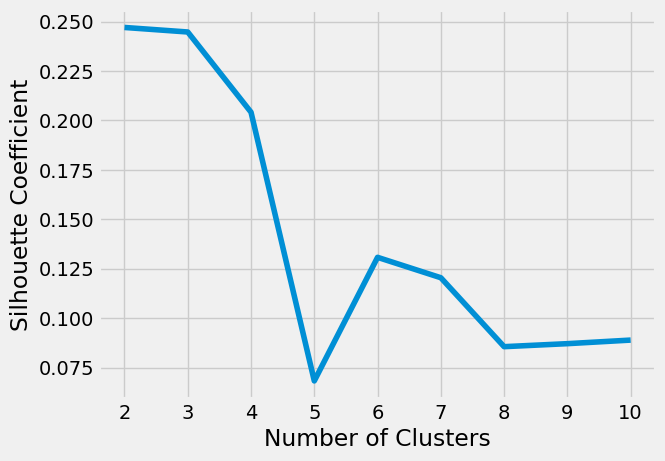

In [19]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [20]:
kmeans = KMeans(
  init="random",
  n_clusters=2,
  n_init=10,
  max_iter=300,
  random_state=42
)

In [21]:
kmeans.fit(scaled_df)

KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

In [22]:
kmeans.inertia_

39946.646706925065

In [23]:
kmeans.cluster_centers_

array([[ 2.25855815e-03,  2.18733979e-02,  1.52263323e-02,
        -8.84794662e-04,  1.20634732e-02,  2.27741810e-02,
         1.32089912e-02,  1.13599460e-02, -2.74001735e-02,
         8.02950920e-03,  2.27741810e-02,  4.82656663e-03,
        -3.35656861e-01,  4.00438176e-02, -1.13599460e-02,
         8.00295091e-03,  3.87496260e-03,  2.24658181e-02,
         4.07576371e-02,  9.31558698e-02, -3.83810399e-01,
        -3.79815315e-01, -2.72003313e-01, -1.08019358e-01,
        -9.79795897e-02, -6.30692060e-02, -1.39769456e-01,
        -4.88143783e-02, -2.96386168e-01, -9.79795897e-02,
        -1.65241462e-01,  2.94052619e-02, -4.12931142e-02,
         2.60274427e-02],
       [-7.92108610e-03, -7.67131312e-02, -5.34009226e-02,
         3.10310128e-03, -4.23083238e-02, -7.98723064e-02,
        -4.63258192e-02, -3.98409536e-02,  9.60963229e-02,
        -2.81606359e-02, -7.98723064e-02, -1.69274587e-02,
         1.17719656e+00, -1.40439389e-01,  3.98409536e-02,
        -2.80674921e-02, -1.35

In [24]:
kmeans.n_iter_

6

In [25]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [26]:
nueva_columna = pd.Series(kmeans.labels_, name='Labels')
df['Labels'] = nueva_columna

In [27]:
df

,ID,edad_,uni_med_,area_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,pac_hos_,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,latitud,longitud,sexo_2,Labels
0,1,25,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,7.076011,-73.102501,0,0
1,2,24,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,7.079495,-73.105400,1,0
2,3,58,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,7.090290,-73.091003,1,0
3,4,29,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,7.067435,-73.090958,0,0
4,5,56,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,7.066905,-73.104980,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,36,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,7.072610,-73.099487,0,1
1258,1259,42,1,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,7.065252,-73.103607,1,1
1259,1260,2,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,7.091391,-73.103264,1,0
1260,1261,12,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,7.061083,-73.097000,0,0


In [28]:
clusters = df.groupby('Labels')

for nombre, cluster in clusters:
    print(f"Cluster: {clusters}")
    print(cluster)

Cluster: <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7a9a493d3eb0>
        ID  edad_  uni_med_  area_  gp_discapa  gp_desplaz  gp_migrant  \
0        1     25         1      1           0           0           0   
1        2     24         1      1           0           0           0   
2        3     58         1      1           0           0           0   
3        4     29         1      1           0           0           0   
5        6     45         1      1           0           0           0   
...    ...    ...       ...    ...         ...         ...         ...   
1255  1256     71         1      1           0           0           0   
1256  1257     49         1      1           0           0           0   
1259  1260      2         1      1           0           0           0   
1260  1261     12         1      1           0           0           0   
1261  1262     14         1      1           0           0           0   

      gp_carcela  gp_gestan  g

In [29]:
cluster0 = clusters.get_group(0)
print(cluster0)

        ID  edad_  uni_med_  area_  gp_discapa  gp_desplaz  gp_migrant  \
0        1     25         1      1           0           0           0   
1        2     24         1      1           0           0           0   
2        3     58         1      1           0           0           0   
3        4     29         1      1           0           0           0   
5        6     45         1      1           0           0           0   
...    ...    ...       ...    ...         ...         ...         ...   
1255  1256     71         1      1           0           0           0   
1256  1257     49         1      1           0           0           0   
1259  1260      2         1      1           0           0           0   
1260  1261     12         1      1           0           0           0   
1261  1262     14         1      1           0           0           0   

      gp_carcela  gp_gestan  gp_calle  gp_psiquia  gp_vic_vio  pac_hos_  \
0              0          1         

In [30]:
cluster1 = clusters.get_group(1)
print(cluster1)

        ID  edad_  uni_med_  area_  gp_discapa  gp_desplaz  gp_migrant  \
4        5     56         1      1           0           0           0   
6        7     46         1      1           0           0           0   
10      11     14         1      1           0           0           0   
11      12     10         1      1           0           0           0   
12      13      9         1      1           0           0           0   
...    ...    ...       ...    ...         ...         ...         ...   
1248  1249     27         1      1           0           0           0   
1249  1250     20         1      1           0           0           0   
1252  1253     23         1      1           0           0           0   
1257  1258     36         1      1           0           0           0   
1258  1259     42         1      1           0           0           0   

      gp_carcela  gp_gestan  gp_calle  gp_psiquia  gp_vic_vio  pac_hos_  \
4              0          0         